<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Setup-notebook" data-toc-modified-id="Setup-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup notebook</a></span></li><li><span><a href="#Import-and-clean-the-data" data-toc-modified-id="Import-and-clean-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and clean the data</a></span><ul class="toc-item"><li><span><a href="#Get-energy-data" data-toc-modified-id="Get-energy-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get energy data</a></span></li><li><span><a href="#Clean-up-energy-data" data-toc-modified-id="Clean-up-energy-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clean up energy data</a></span></li><li><span><a href="#Get-PLUTO-data" data-toc-modified-id="Get-PLUTO-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Get PLUTO data</a></span></li><li><span><a href="#Clean-up-PLUTO-data" data-toc-modified-id="Clean-up-PLUTO-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clean up PLUTO data</a></span></li><li><span><a href="#Merge-and-clean-data" data-toc-modified-id="Merge-and-clean-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Merge and clean data</a></span></li></ul></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the data</a></span><ul class="toc-item"><li><span><a href="#Plot-a-scatter-matrix" data-toc-modified-id="Plot-a-scatter-matrix-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot a scatter matrix</a></span></li><li><span><a href="#Plot-a-scatter-plot-of-total-energy-use-against-number-of-units" data-toc-modified-id="Plot-a-scatter-plot-of-total-energy-use-against-number-of-units-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot a scatter plot of total energy use against number of units</a></span></li><li><span><a href="#Plot-a-log-log-relationship" data-toc-modified-id="Plot-a-log-log-relationship-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot a log-log relationship</a></span></li><li><span><a href="#Plot-a-log-linear-relationship" data-toc-modified-id="Plot-a-log-linear-relationship-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Plot a log-linear relationship</a></span></li></ul></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Fit-the-model-units-to-energy" data-toc-modified-id="Fit-the-model-units-to-energy-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fit the model units to energy</a></span></li><li><span><a href="#Fit-the-model-energy-to-units" data-toc-modified-id="Fit-the-model-energy-to-units-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit the model energy to units</a></span></li><li><span><a href="#Use-a-chi-square-goodness-of-fit-test-to-see-which-works-better" data-toc-modified-id="Use-a-chi-square-goodness-of-fit-test-to-see-which-works-better-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Use a chi square goodness of fit test to see which works better</a></span></li><li><span><a href="#Use-a-second-degree-polynomial-model" data-toc-modified-id="Use-a-second-degree-polynomial-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Use a second degree polynomial model</a></span></li><li><span><a href="#Use-log-likelihood-ratio-test-to-see-which-is-a-better-model" data-toc-modified-id="Use-log-likelihood-ratio-test-to-see-which-is-a-better-model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Use log likelihood ratio test to see which is a better model</a></span></li></ul></li></ul></div>

# HW6
**NetID:** sac820@nyu.edu

## Setup notebook

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import pylab as pl
import os, shutil
import zipfile
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA does not point to set PUIdata directory!")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Import and clean the data

### Get energy data

In [2]:
os.system("curl -O https://data.cityofnewyork.us/resource/m46j-75iy.csv");
path = os.getcwd()
oldFile = path + "/" + "m46j-75iy.csv"
newFile = os.getenv("PUIDATA") + "energy.csv"
shutil.move(oldFile, newFile);

In [3]:
energyData = pd.read_csv(newFile)

### Clean up energy data

In [4]:
keepColumns = ['reported_property_floor_area_building_s_ft', 'nyc_borough_block_and_lot_bbl',
              'site_eui_kbtu_ft2']
energyData = pd.DataFrame(energyData, columns=keepColumns)
energyData = energyData.dropna()

In [5]:
energyData['reported_property_floor_area_building_s_ft'] = pd.to_numeric(energyData['reported_property_floor_area_building_s_ft'], errors='coerce')
energyData['site_eui_kbtu_ft2'] = pd.to_numeric(energyData['site_eui_kbtu_ft2'], errors='coerce')

In [6]:
energyData.columns = ['Building Floor Area Square Feet', 'BBL', 'kBtu per square foot']

In [7]:
energyData['Total Energy Use'] = energyData['Building Floor Area Square Feet'] * energyData['kBtu per square foot']

### Get PLUTO data

In [8]:
boroughs = ('mn', 'bx', 'bk', 'qn', 'si')

for borough in boroughs:
    url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/' + borough + '_mappluto_16v2.zip'
    os.system("curl -O " + url);

In [9]:
path = os.getcwd()
for borough in boroughs:
    oldFile = path + "/" + borough + "_mappluto_16v2.zip"
    newFile = os.getenv("PUIDATA") + borough + "_mappluto_16v2.zip"
    shutil.move(oldFile, newFile);
    zip_ref = zipfile.ZipFile(newFile, 'r')
    zip_ref.extractall(os.getenv("PUIDATA"))
    zip_ref.close()

In [11]:
mnData = gp.read_file(os.getenv('PUIDATA') + '/MNMapPLUTO.shp')
bxData = gp.read_file(os.getenv('PUIDATA') + '/BXMapPLUTO.shp')
bkData = gp.read_file(os.getenv('PUIDATA') + '/BKMapPLUTO.shp')
qnData = gp.read_file(os.getenv('PUIDATA') + '/QNMapPLUTO.shp')
siData = gp.read_file(os.getenv('PUIDATA') + '/SIMapPLUTO.shp')
frames = [mnData, bxData, bkData, qnData, siData]
plutoData = pd.concat(frames)

### Clean up PLUTO data

In [12]:
keepColumns = ['UnitsTotal', 'BBL']
plutoData = pd.DataFrame(plutoData, columns=keepColumns)
plutoData = plutoData.dropna()

plutoData.columns = ['Number of Units', 'BBL']

plutoData = plutoData[plutoData['Number of Units'] != 0]

### Merge and clean data

In [13]:
data = plutoData.merge(energyData, on='BBL')

In [14]:
data['Average energy use per unit'] = data['Total Energy Use'] / data['Number of Units']
data['Log Energy'] = np.log10(data['Total Energy Use'])
data['Log Units'] = np.log10(data['Number of Units'])

In [15]:
data = data[data['Number of Units'] != 0]
data = data[data['Total Energy Use'] != 0]
data = data.drop(['BBL', 'Building Floor Area Square Feet','kBtu per square foot', 'Average energy use per unit'], axis=1)
data = data.dropna()

We created a smaller dataset in case of outliers.

In [16]:
smallerData = data
smallerData = smallerData[smallerData['Total Energy Use'] < 1.939143e+07]
smallerData = smallerData[smallerData['Number of Units'] > 12]
smallerData = smallerData[smallerData['Total Energy Use'] > 5.402752e+06]

## Plot the data

### Plot a scatter matrix

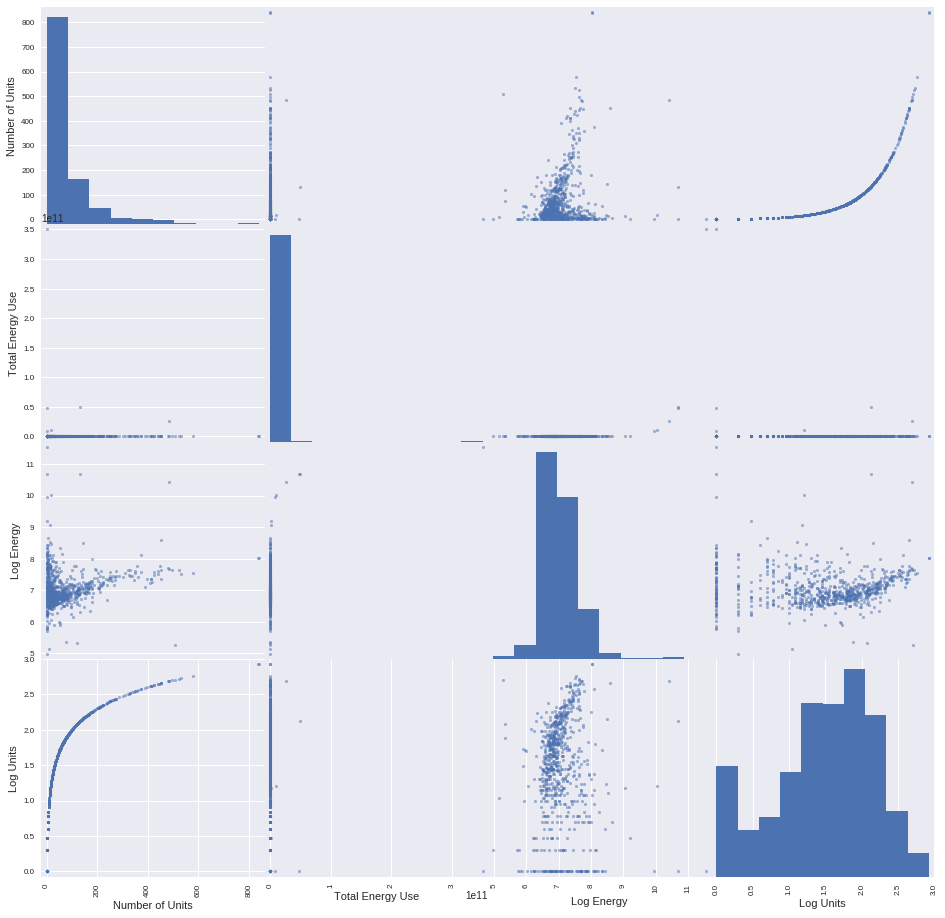

In [17]:
scatter_matrix(data, s=30, figsize=(16, 16));

**Figure 1A:** This scatter matrix plots every variable against every other variable (including itself) which gives a quick way to see what may or may not have an interesting visual relationship. Here we use all the data.

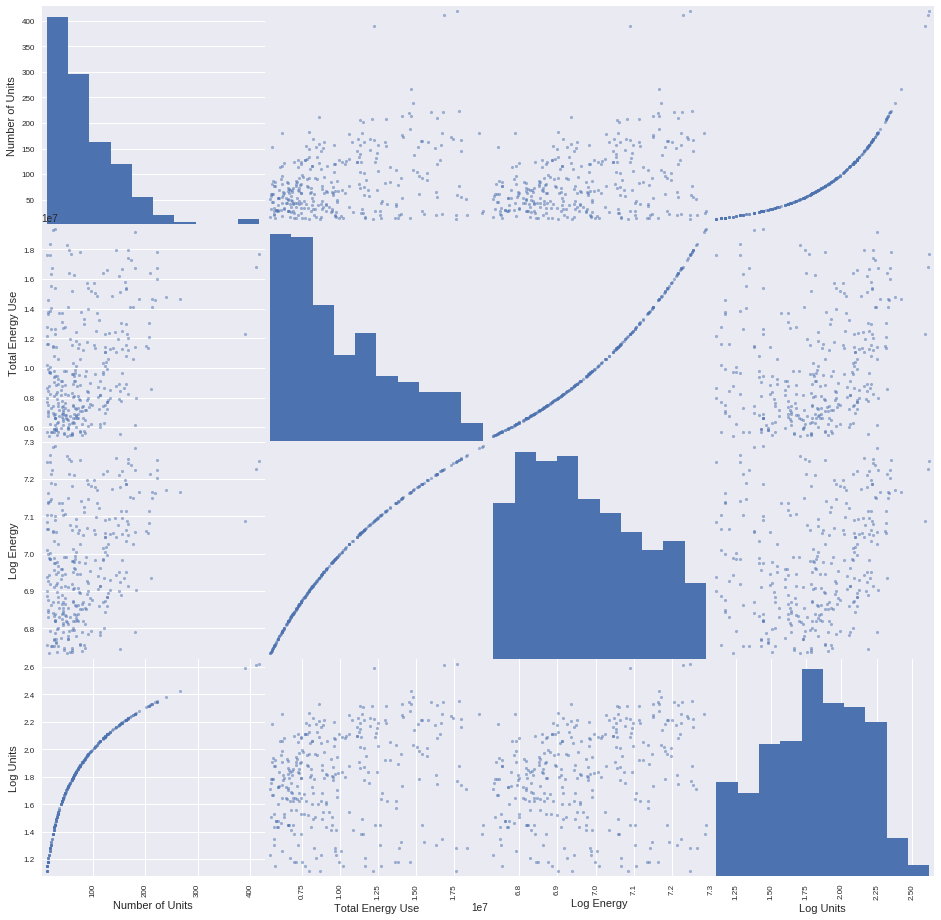

In [18]:
scatter_matrix(smallerData, s=30, figsize=(16, 16));

**Figure 1B:** Again we use a scatter matrix plotting every variable against every other variable (including itself). This time we use data that has been squeezed into the middle 50% of the data to try to push out outliers.

### Plot a scatter plot of total energy use against number of units

(-17507158600.004719, 367652442600.0047)

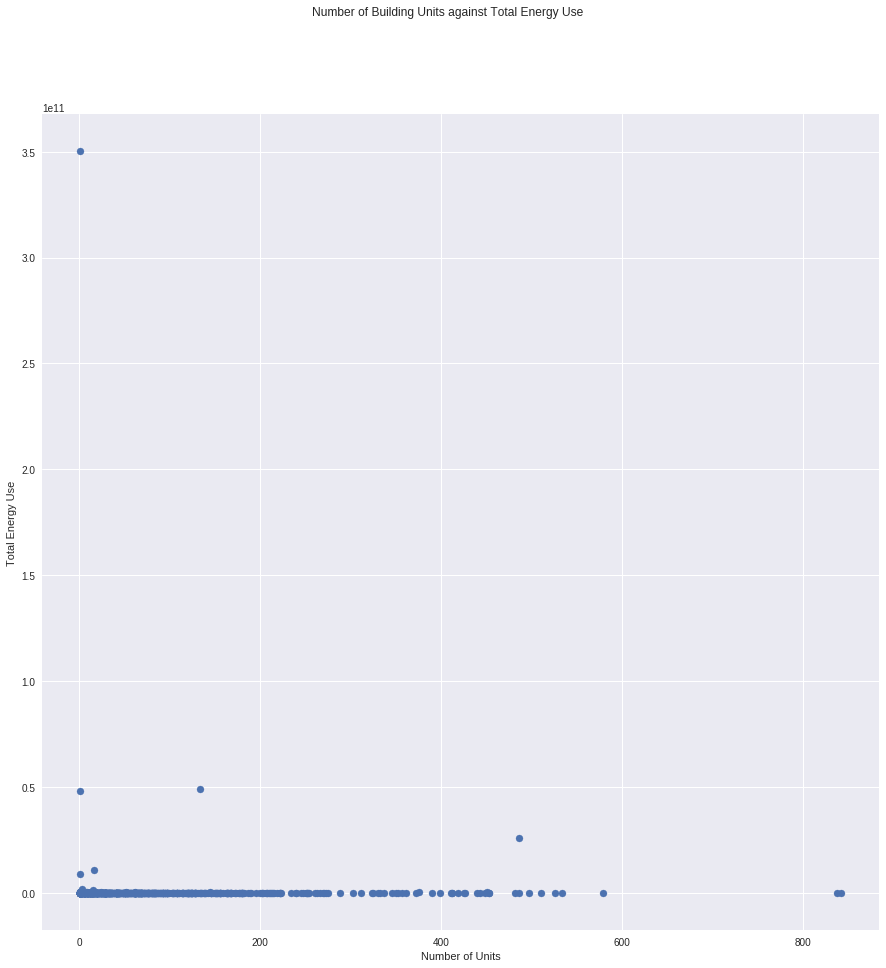

In [19]:
fig = pl.figure(figsize=(15,15))
fig.suptitle('Number of Building Units against Total Energy Use')

ax = fig.add_subplot(111)
ax.scatter(data['Number of Units'], data['Total Energy Use'])
ax.set_xlabel("Number of Units")
ax.set_ylabel("Total Energy Use")
ax.set_ylim()

**Figure 2A:** This simple scatter plot between number of units in a building and total energy use is quite bunched around low energy use. Outliers may be affecting the data.

(4704430.0752783921, 20077363.92472161)

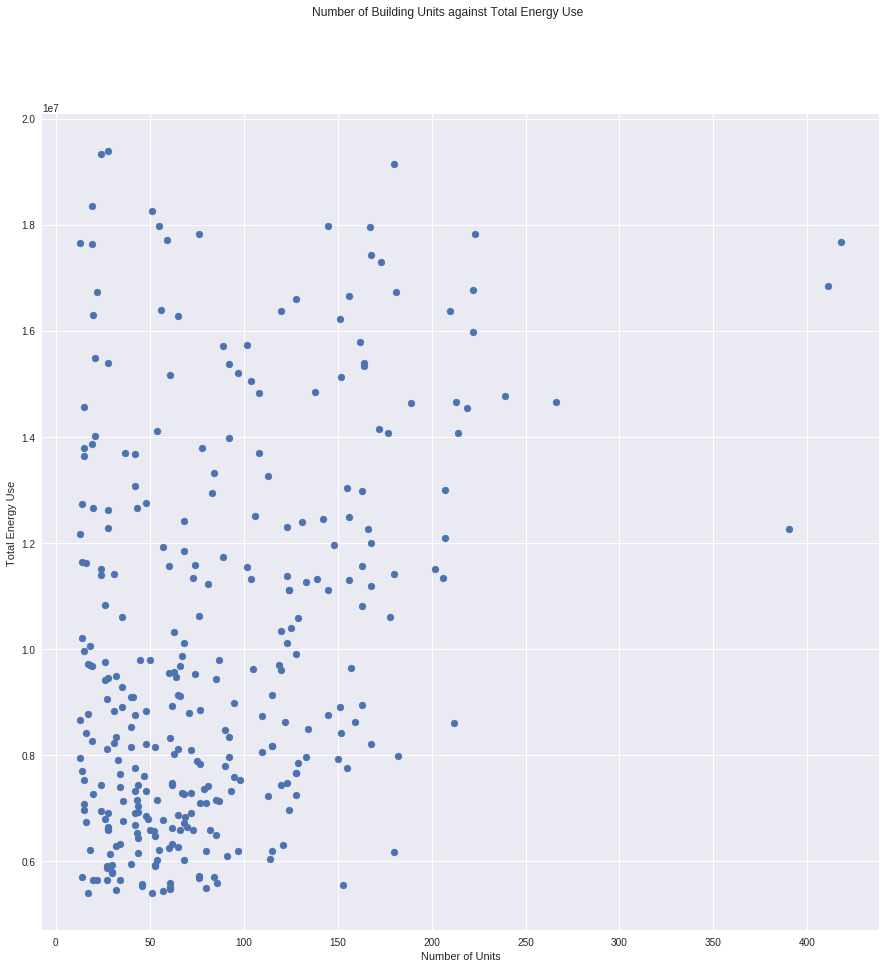

In [20]:
fig = pl.figure(figsize=(15,15))
fig.suptitle('Number of Building Units against Total Energy Use')

ax = fig.add_subplot(111)
ax.scatter(smallerData['Number of Units'], smallerData['Total Energy Use'])
ax.set_xlabel("Number of Units")
ax.set_ylabel("Total Energy Use")
ax.set_ylim()

**Figure 2B:** This simple scatter plot between number of units in a building and total energy use is quite spread out. It may be hard to tease out a relationship.

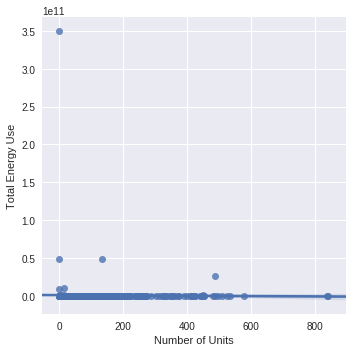

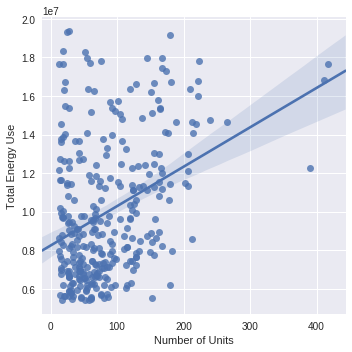

In [21]:
sns.lmplot(x="Number of Units", y="Total Energy Use", data=data);
sns.lmplot(x="Number of Units", y="Total Energy Use", data=smallerData);

**Figure 2C:** The use of the smaller dataset teases out a bit of a pattern.

### Plot a log-log relationship

(4.6494507775516931, 11.87706861776004)

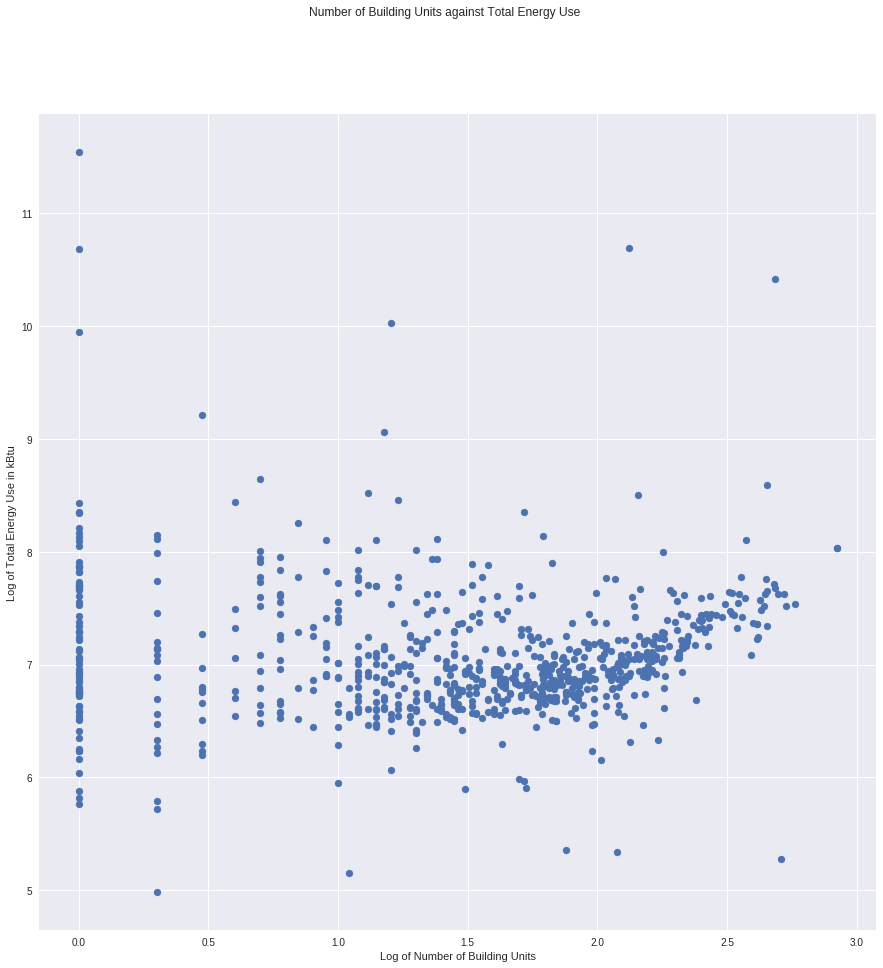

In [22]:
fig = pl.figure(figsize=(15,15))
fig.suptitle('Number of Building Units against Total Energy Use')

ax = fig.add_subplot(111)
x = data['Log Units']
y = data['Log Energy']
ax.scatter(x, y)
ax.set_ylabel("Log of Total Energy Use in kBtu")
ax.set_xlabel("Log of Number of Building Units")
ax.set_ylim()

**Figure 3A:** By plotting the logs of both variables, we can see a different relationship begin to emerge with perhaps a very steep positive linear relationship. The log is helpful because it squeezes the energy use into smaller increments.

(6.7001958561296764, 7.3197774395012996)

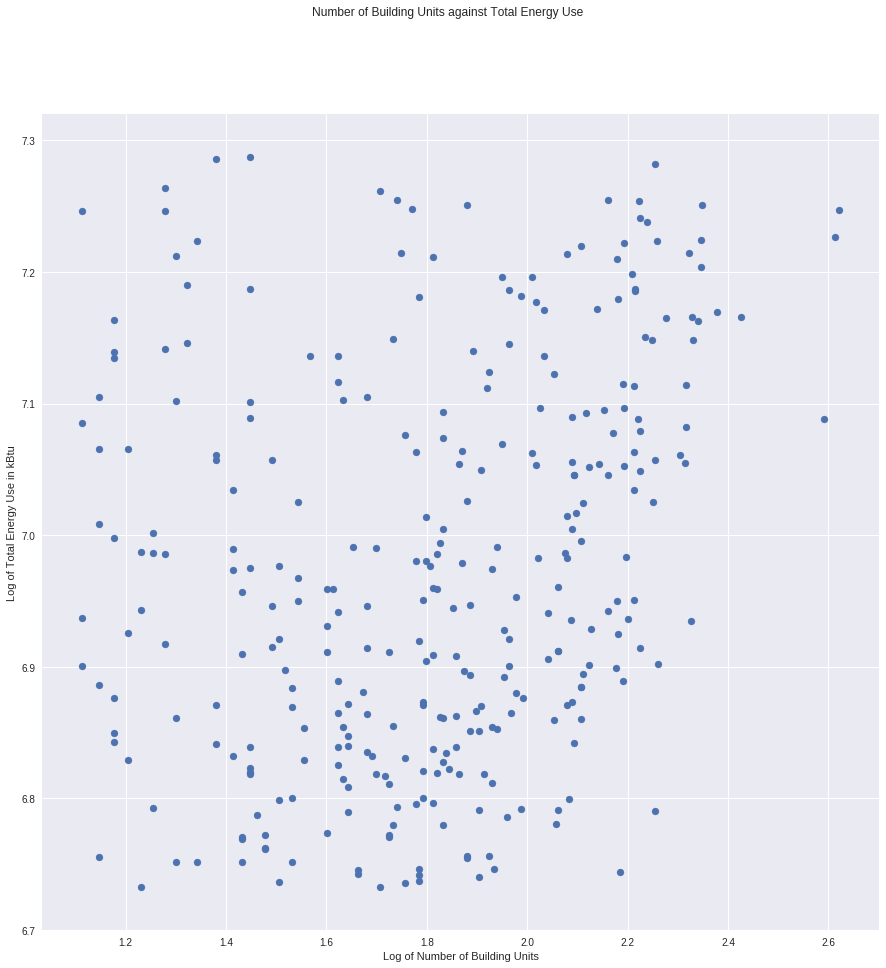

In [23]:
fig = pl.figure(figsize=(15,15))
fig.suptitle('Number of Building Units against Total Energy Use')

ax = fig.add_subplot(111)
x = smallerData['Log Units']
y = smallerData['Log Energy']
ax.scatter(x, y)
ax.set_ylabel("Log of Total Energy Use in kBtu")
ax.set_xlabel("Log of Number of Building Units")
ax.set_ylim()

**Figure 3B:** With the smaller dataset, a log-log relationship seems random.

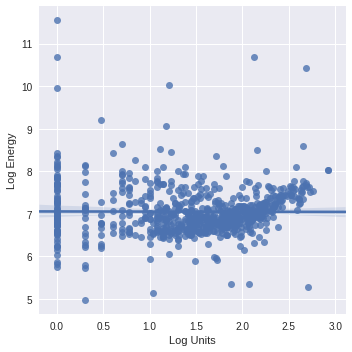

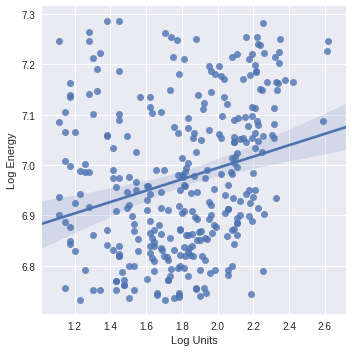

In [24]:
sns.lmplot(x="Log Units", y="Log Energy", data=data);
sns.lmplot(x="Log Units", y="Log Energy", data=smallerData);

**Figure 3C:** Again, the smaller data set teases out a better relationship.

### Plot a log-linear relationship

(4.6494507775516931, 11.87706861776004)

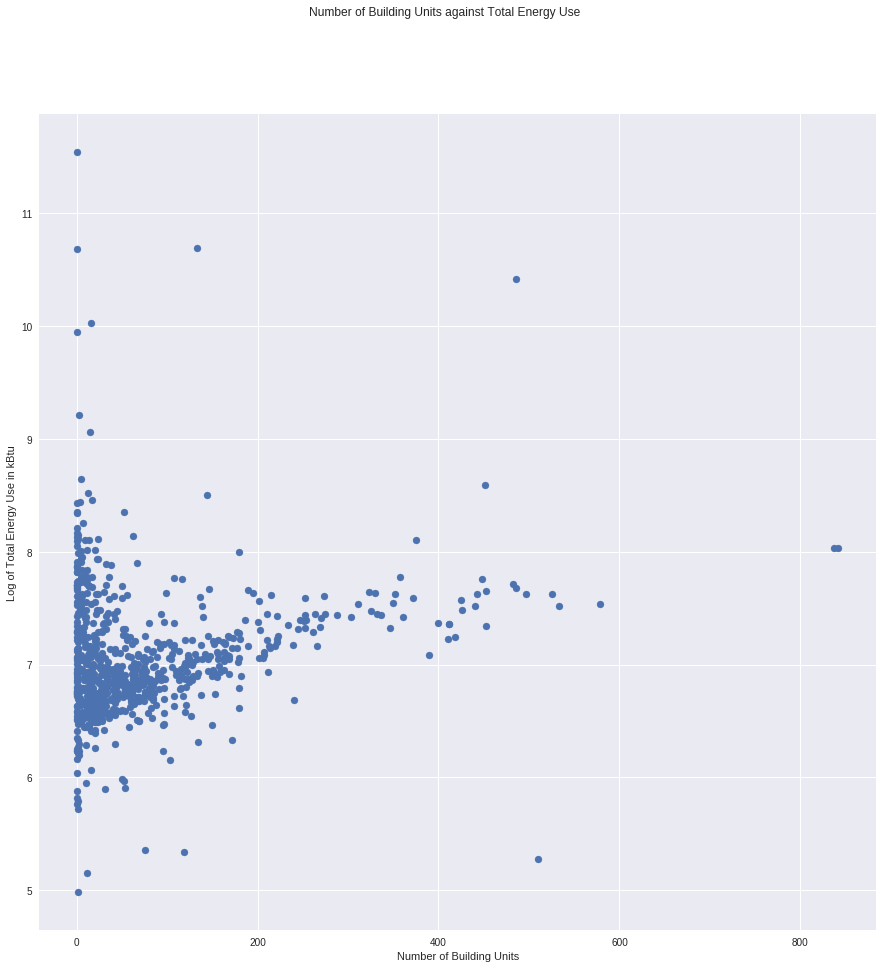

In [25]:
fig = pl.figure(figsize=(15,15))
fig.suptitle('Number of Building Units against Total Energy Use')

ax = fig.add_subplot(111)
x = data['Number of Units']
y = data['Log Energy']
ax.scatter(x, y)
ax.set_ylabel("Log of Total Energy Use in kBtu")
ax.set_xlabel("Number of Building Units")
ax.set_ylim()

**Figure 4A:** This log-linear relationship shows that there does seem to be some sort of positive relationship. However, there seems to be a large aggregate of points with low number of units.

(-17507158600.004719, 367652442600.0047)

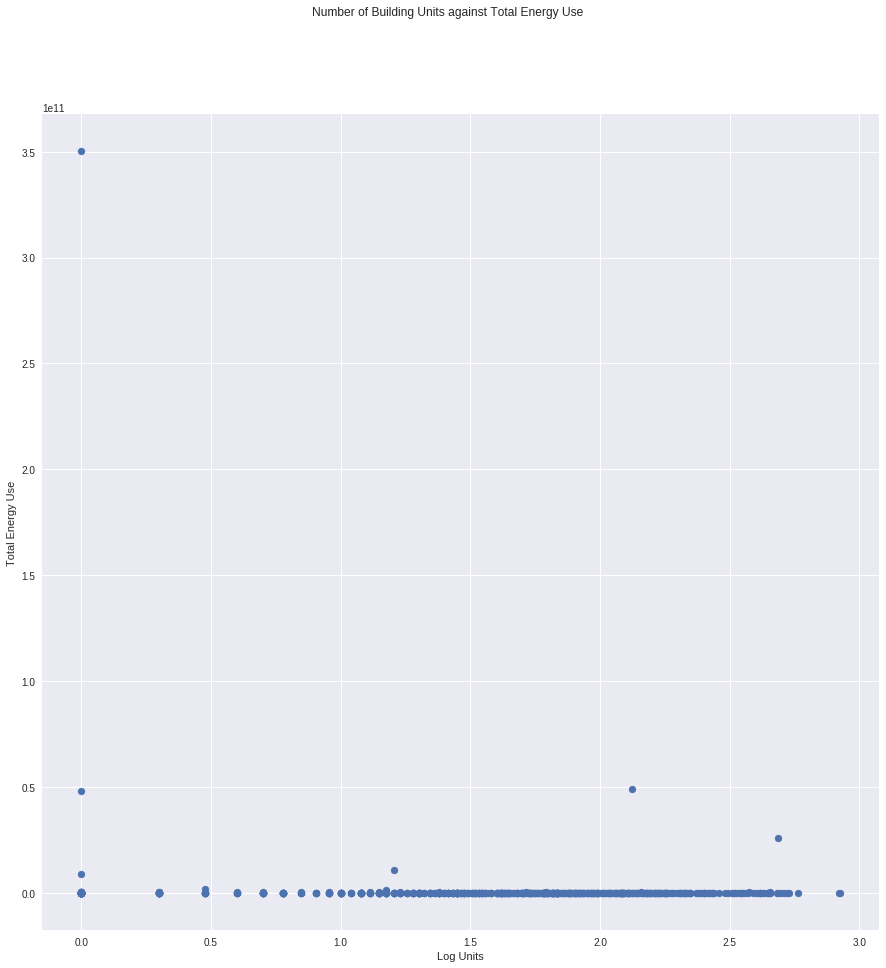

In [26]:
fig = pl.figure(figsize=(15,15))
fig.suptitle('Number of Building Units against Total Energy Use')

ax = fig.add_subplot(111)
x = data['Log Units']
y = data['Total Energy Use']
ax.scatter(x, y)
ax.set_ylabel("Total Energy Use")
ax.set_xlabel("Log Units")
ax.set_ylim()

**Figure 4B:** This log-linear relationship doesn't really show much

## Model the data

### Fit the model units to energy

In [27]:
X = sm.add_constant(data['Log Energy'])
Y = data['Number of Units']
unitsModel = sm.OLS(endog=Y, exog=X, missing='drop').fit() 
unitsModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Number of Units   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     32.10
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           2.07e-08
Time:                        16:58:47   Log-Likelihood:                -4672.2
No. Observations:                 772   AIC:                             9348.
Df Residuals:                     770   BIC:                             9358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -178.8437     45.219     -3.955      0.000      -267.611   -90.077
Log Energy    36.2039      6.390      5.666      0.000        23.660    48.748
==============================================================================
Omnibus:                      445.466   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3843.505
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      12.705   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** The R-squared value is 0, and the p-value of the coefficient of the log of energy use is non significant. This does not look like it explains much.

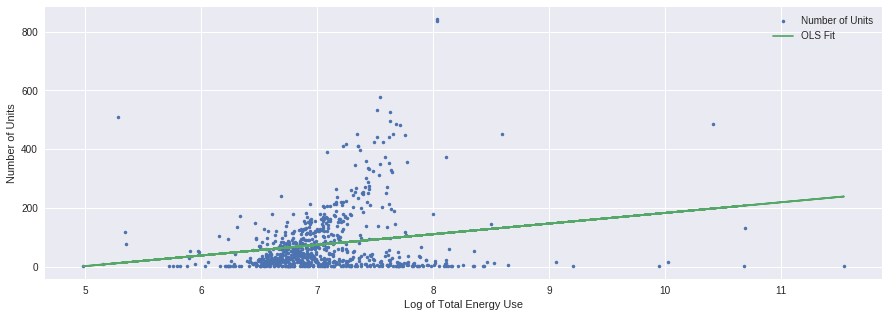

In [28]:
fittedValues = unitsModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(data['Log Energy'], data['Number of Units'], '.')
pl.plot(data['Log Energy'], fittedValues, '-', label='OLS Fit')
ax.set_xlabel("Log of Total Energy Use")
ax.set_ylabel("Number of Units")
pl.legend()
pl.show()

**Figure 5A:** Log-linear regression of the number of units fitted to the log of total energy use. There doesn't seem to be much here.

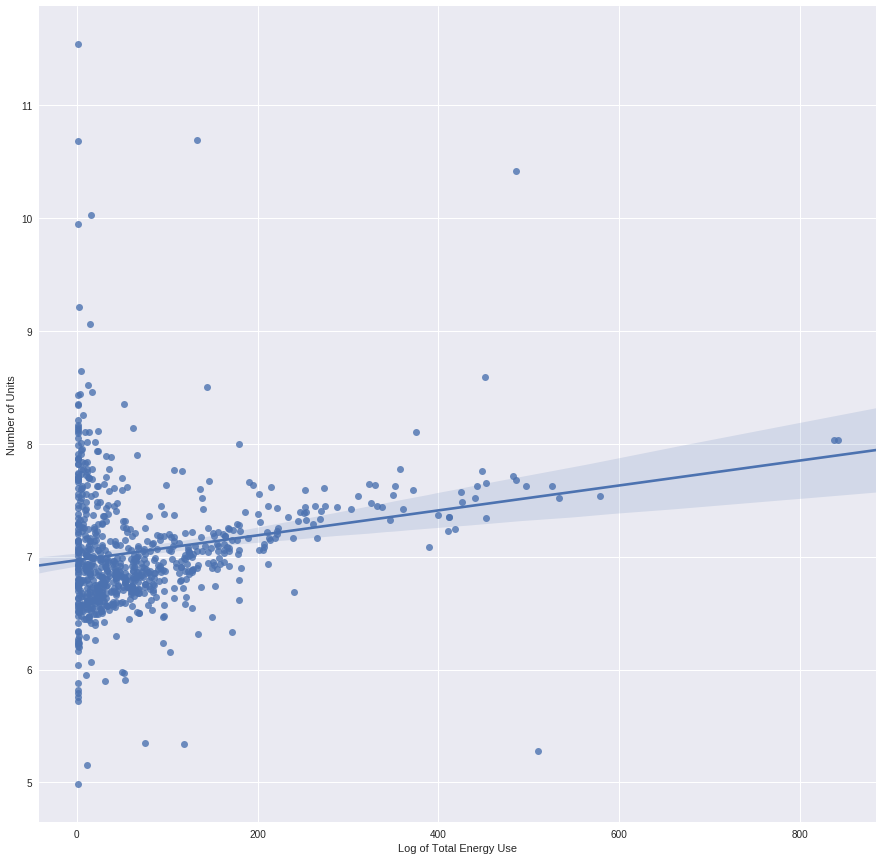

In [29]:
fig = pl.figure(figsize=(15,15)) 

ax2 = fig.add_subplot(111)
ax2 = sns.regplot(x="Number of Units", y="Log Energy", data=data)
ax2.set_xlabel("Log of Total Energy Use")
ax2.set_ylabel("Number of Units")

pl.show()

**Figure 5B:** The spread around the model seems quite large.

### Fit the model energy to units

In [30]:
X = sm.add_constant(data['Number of Units'])
energyModel = sm.OLS(data['Log Energy'], X, missing='drop').fit() 
energyModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log Energy   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     32.10
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           2.07e-08
Time:                        16:58:48   Log-Likelihood:                -659.10
No. Observations:                 772   AIC:                             1322.
Df Residuals:                     770   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               6.9680      0.025    274.995      0.000         6.918     7.018
Number of Units     0.0011      0.000      5.666      0.000         0.001     0.001
==============================================================================
Omnibus:                      419.999   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5785.036
Skew:                           2.139   Prob(JB):                         0.00
Kurtosis:                      15.710   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** The R-squared value is the same as before, and the p-value of the coefficient of the log of energy use is still insignificant. 

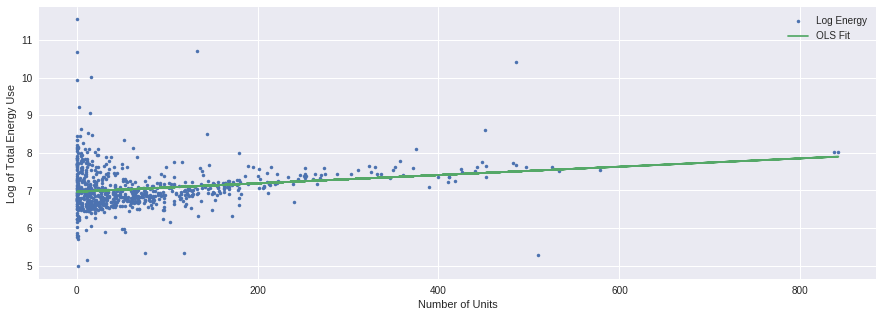

In [31]:
fittedValues = energyModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(data['Number of Units'], data['Log Energy'], '.')
pl.plot(data['Number of Units'], fittedValues, '-', label='OLS Fit')
ax.set_xlabel("Number of Units")
ax.set_ylabel("Log of Total Energy Use")
pl.legend()
pl.show()

**Figure 6A:** This line may be almost flat but it does seem to fit the data better.

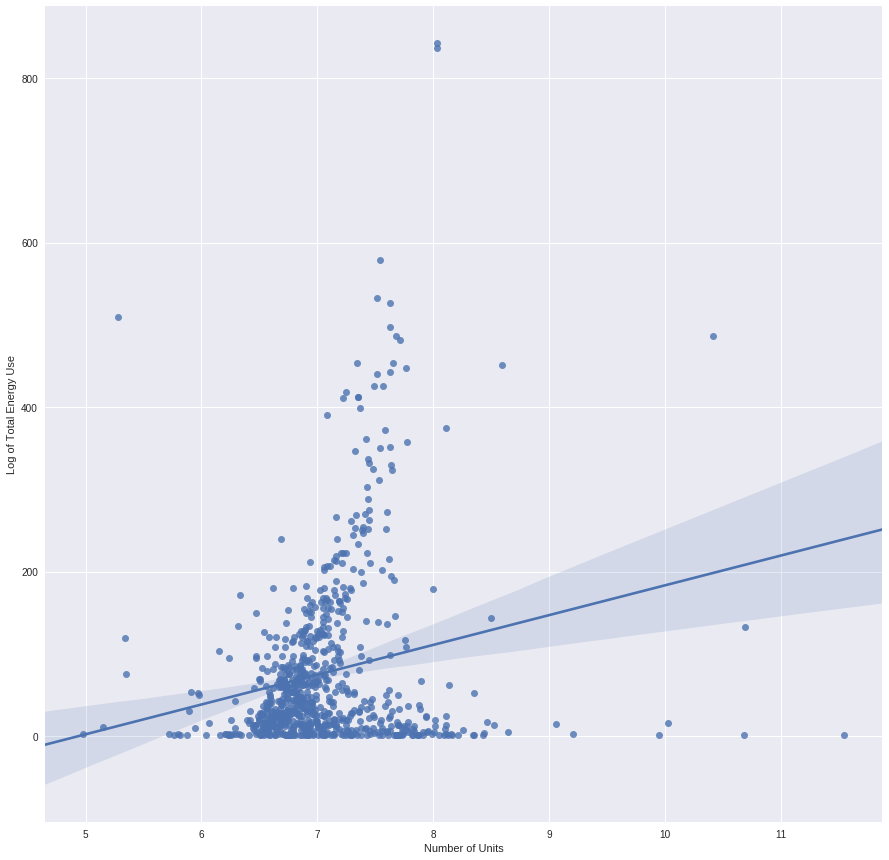

In [32]:
fig = pl.figure(figsize=(15,15)) 

ax2 = fig.add_subplot(111)
ax2 = sns.regplot(x="Log Energy", y="Number of Units", data=data)
ax2.set_ylabel("Log of Total Energy Use")
ax2.set_xlabel("Number of Units")

pl.show()

**Figure 6B:** It seems that using a log-linear relationship looks better.

### Use a chi square goodness of fit test to see which works better

$$\chi^2 = \sum_i \dfrac{(model(x_i) - data(x_i))^2 }{ error_i^2}$$

In [33]:
chi = stats.chisquare(data['Log Energy'], energyModel.fittedvalues)
print(chi)

Power_divergenceResult(statistic=35.451466601670475, pvalue=1.0)


In [34]:
chi = stats.chisquare(data['Number of Units'], unitsModel.fittedvalues)
print(chi)

Power_divergenceResult(statistic=106773.7986198524, pvalue=0.0)


By having a lower statistic, we see that fitting energy use to number of units - that is number of units is the independent variable and energy use is the dependent variable - is the better model.

### Use a second degree polynomial model

**Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2 + bx + c$ .


In [35]:
df = pd.DataFrame({'y':data['Log Energy'], 'x':data['Number of Units']})
quadraticModel = smf.ols('y ~ x + I(x**2)', data=df).fit()
quadraticModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     19.10
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           7.99e-09
Time:                        16:58:49   Log-Likelihood:                -656.15
No. Observations:                 772   AIC:                             1318.
Df Residuals:                     769   BIC:                             1332.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0038      0.029    239.497      0.000         6.946     7.061
x              0.0002      0.000      0.440      0.660        -0.001     0.001
I(x ** 2)   2.041e-06    8.4e-07      2.430      0.015      3.92e-07  3.69e-06
==============================================================================
Omnibus:                      409.792   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5682.118
Skew:                           2.065   Prob(JB):                         0.00
Kurtosis:                      15.633   Cond. No.                     7.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

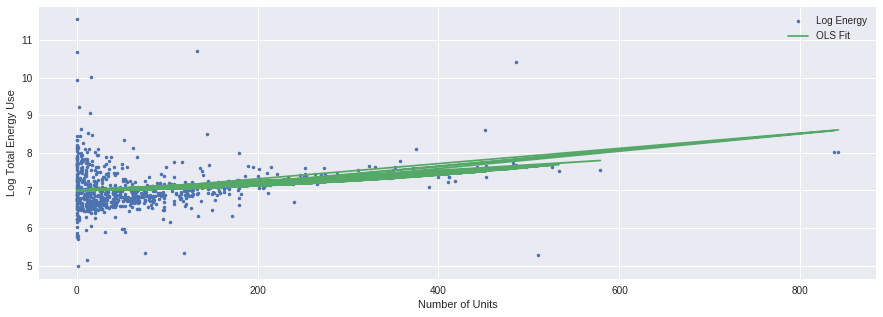

In [36]:
fittedValues = quadraticModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(data['Number of Units'], data['Log Energy'], '.')
pl.plot(data['Number of Units'], fittedValues, '-', label='OLS Fit')
ax.set_xlabel("Number of Units")
ax.set_ylabel("Log Total Energy Use")
pl.legend()
pl.show()

**Figure 7:** By introducing a polynomial, more of the data fits.

### Use log likelihood ratio test to see which is a better model

$$LR = -2 log \dfrac{L(model 1)}{L(model 2)}$$

<center>Degrees of freedom is difference in number of parameters. The simpler model is in numerator.<center>

<img src='http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG'>

In [37]:
print(-2 * (energyModel.llf - quadraticModel.llf))

5.90561832725


In [38]:
quadraticModel.compare_lr_test(energyModel)

(5.905618327250977, 0.01509266678180402, 1.0)

With a 1 degree of freedom and a cut off of 0.05, the test statistic must be 3.84 or above. At 55, we can say that the quadratic model is the greater fit.

## ASH - Score 100